<a href="https://colab.research.google.com/github/LeeJaeEun0/st1215/blob/main/221215_ch04_ML_01_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 선형회귀
> 보험료 예측하기

In [49]:
# 필요한 라이브러리 불러오기
import pandas as pd

In [50]:
# https://www.kaggle.com/
#1. 직접적으로 파일 경로
#2. 외부의 링크를 직접 썻 연결
df=pd.read_csv("https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.80,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.90,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,no,northwest,10600.55
1334,18,female,31.90,0,no,northeast,2205.98
1335,18,female,36.90,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.95


In [51]:
# df을 불러오면 4개를 해봐야합니다
# df.head, df.tail, df.info, df.describe
df.head()
# age: 나이, sex:성별, bmi, childeren: 자녀수, region: 지역, expenses: 보험료
# 보험료는 종속변수,목표변수(타겟변수) - 다른 요소를 통해서 결정되니까!

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.80,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.90,0,no,northwest,3866.86


In [52]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.00,3,no,northwest,10600.55
1334,18,female,31.90,0,no,northeast,2205.98
1335,18,female,36.90,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.95
1337,61,female,29.10,0,yes,northwest,29141.36


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.describe() # 연속형 변수에 대한 통계치

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


In [55]:
# 소수점 2자리 표시
pd.options.display.float_format = "{:.2f}".format

In [56]:
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


In [57]:
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## 실습 - 도표로 만들기

In [58]:
import seaborn as sns

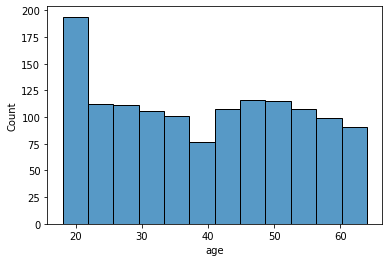

In [59]:
# 1. 나이
sns.histplot(data=df, x='age')

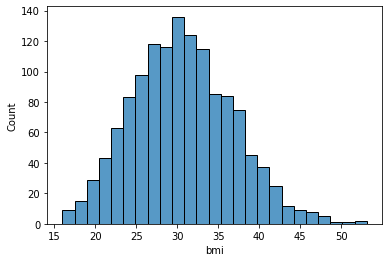

In [60]:
# 2. bmi
sns.histplot(data=df, x='bmi')

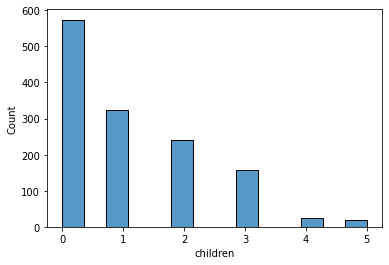

In [61]:
# 3. 아이의 수
sns.histplot(data=df, x='children')

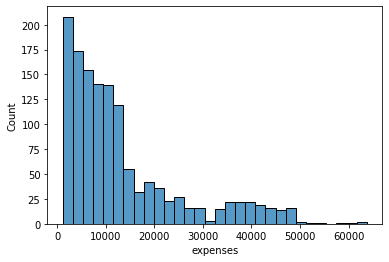

In [62]:
# 4. 보험료
sns.histplot(data=df, x='expenses')

## 데이터 전처리
* 데이터를 모델링할 수 있게 다듬는 과정
1. 하지 않으면 모델링 자체가 안되는 전처리
1. 모델의 성능을 높이기 위한 전처리

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 모델을 통해서 학습을 시켜주려면 x(독립변수들에 있는) 값들이 모두 숫자형태여야함

# 독립변수들(X) => 2개 이상의 열을 가진 df
X = df.drop('expenses', axis=1)
# 종속변수(y) => 1개
y = df['expenses']
try:
    model.fit(X, y) # 훈련
except Exception as e:
    print(type(e))
    print(e) 
    # 숫자 형태여야 처리할 수 있는데 오브젝트 형태인 범주형 변수들이 처리 불가 - 버그를 일으킴

<class 'ValueError'>
could not convert string to float: 'female'


In [64]:
df.info() # Dtype가 object로 되어있는 것을 숫자로 바꿔야 처리 가능
# 4   smoker    1338 non-null   object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [65]:
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [66]:
df.smoker.value_counts()  # df.uninque(), df.nunique()

no     1064
yes     274
Name: smoker, dtype: int64

In [67]:
# yes: 1, no:0
(df.smoker == 'yes')*1
# (df.smoker == 'yes') + 0
# yes/no = 1과 0이니까 숫자 연산을 통해서 숫자 형태로 바꾸는 것

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [68]:
# equal: 동일여부 연산
# mul:multply
df.smoker.eq('yes').mul(1)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [69]:
df.smoker = df.smoker.eq('yes').mul(1)
df.info()
# 4   smoker    1338 non-null   int64로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


### 범주형 데이터처리 / 더미 변수(원-핫 인코딩)
* sex: `is_male` / `is_female`
* region: `ne` , `nw` , `se`, `sw` (0,1,1,...)

In [70]:
# pd.get_dummies(df, columns=[내가 변환시키고 깊은 칼럼 이름들])
pd.get_dummies(df, columns=['sex','region']) # 소속과 특성에 따라 있는 여부 확인
# n개의 고윳값 -> n-1
#열이 많으면 처리 횟수가 많아져서 -> 열을 줄이는 것이 좋음

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,1,0,0,0,0,1
1,18,33.80,1,0,1725.55,0,1,0,0,1,0
2,28,33.00,3,0,4449.46,0,1,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,1,0,0
4,32,28.90,0,0,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,0,1,0,1,0,0
1334,18,31.90,0,0,2205.98,1,0,1,0,0,0
1335,18,36.90,0,0,1629.83,1,0,0,0,1,0
1336,21,25.80,0,0,2007.95,1,0,0,0,0,1


In [71]:
df2 = df.copy()
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True) #첫번째열 삭제
df

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


### 훈련셋 / 시험셋 나누기
* 데이터를 넣어서 모델을 학습시킨 다음에 해당 모델을 가지고 새로운 값을 넣어서 결과를 받아내는 프로그램
* 기존에 학습에 쓰인 데이터 X / 새로운 데이터를 넣어서 검증을 해줘야함
* 100개의 데이터가 있다 -> `70~80`개는 학습에 쓰고, `20~30`개 정도는 검증을 위한 (시험을 위한) 데이터 셋으로 남겨놓음
---
모델링 -> 데이터 분활 작업
1. 종속변수와 독립변수를 분리
  * 독립변수-> (영향) -> 종속변수
2. 학습셋/훈련셋(train set)과 시험셋(testset)분리
  * 학습의 결과에 대한 신뢰성, 정확성을 검증


||독립변수|종속변수|
|-|-|-|
|학습셋|X_train|y_train|
|시험셋|X_test|y_test|

## 독립변수와 종속변수
* **독립변수**
    * 예측에 사용되는 재료와 같은 변수들
    * 피쳐 (Feature), 피쳐 변수 (Feature Variable)
* **종속변수**
    * 예측의 대상이 되는 변수
    * 목표 변수, 타깃, 타깃 변수 (Target Variable)

> '지도 학습'에 속하는 모델들은 독립변수를 통해 종속변수를 예측하는 것이므로, 어떤 변수가 종속변수인지 명확하게 알려줘야함 -> 독립변수와 종속변수를 각각 별도의 데이터로 입력 받게 됨 (`model.fit(X:독립변수df, y:종속변수s)`)

### 학습(훈련)셋과 시험셋
> 학습셋과 시험셋을 구분하지 않고 예측 모델을 만들 경우 새로운 데이터에 대한 예측력을 검증할 수 X
(기출문제를 학습시키고 다시 그 문제로 시험보는 것)
* 전체 데이터를 가지고 모델링(학습)을 하고, 또다시 전체 데이터에 대해서 예측값을 만들어서 종속변수와 비교 -> 특정 데이터에 대해 과최적 되어 있을 수 있음
* 1+1=2를 여러번 해서 알아도 1+2=3이라는 결과가 안 나올 수도 있음
* 기존의 데이터만 학습(특정한 조건에 맞춰서 수식을 만들 수 있음) => 새로운 데이터(원하는데로 처리를 하지 못할 수 있음 = 불확실성)
* 시험셋을 통해 검증하지 않은 상태에서는 불확실성이 존재
* 일반적으로 **학습셋:시험셋**을 각각 7:3, 8:2로 나눔
* 데이터가 너무 적으면 학습셋을 우선시(데이터가 적으면 9:1도 가능)

In [72]:
df # y : expenses <- / X : 독립변수

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [73]:
# 독립변수 - 예측의
X = df.drop('expenses', axis=1) # 독립변수들
# 종속변수 - 예측의 대상
y = df['expenses'] # 목표변수/타깃변수/종속변수
X, y

(      age   bmi  children  smoker  sex_male  region_northwest  \
 0      19 27.90         0       1         0                 0   
 1      18 33.80         1       0         1                 0   
 2      28 33.00         3       0         1                 0   
 3      33 22.70         0       0         1                 1   
 4      32 28.90         0       0         1                 1   
 ...   ...   ...       ...     ...       ...               ...   
 1333   50 31.00         3       0         1                 1   
 1334   18 31.90         0       0         0                 0   
 1335   18 36.90         0       0         0                 0   
 1336   21 25.80         0       0         0                 0   
 1337   61 29.10         0       1         0                 1   
 
       region_southeast  region_southwest  
 0                    0                 1  
 1                    1                 0  
 2                    1                 0  
 3                    0       

In [74]:
# 훈련셋/ 시험셋
from sklearn.model_selection import train_test_split # 훈련셋과 시험셋을 분리, 나눠준다


In [75]:
# train_test_split(X에는 독립변수, y는 종속변수, test_size=시험셋의 비율, random_state=랜덤기준(넘파이 seed 느낌))
# test_size : 전체비율이 1이라고 했을때, test set의 사이즈(0.2~0.3)
# random_state : nupmy.random.seed() -> 똑같은 값이 나올 수 있도록 기주을 잡아줌
# train_test_split(X, y) -> 4개 (1. X 훈련셋, 2. X 시험셋, 3. y 훈련셋 4. y 시험셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [76]:
len(df) 

1338

In [77]:
# X(독립변수들) 훈련셋
X_train # 1338 *0.8 # 0.8인이유는 80% 

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
1007,47,28.20,3,1,1,1,0,0
420,64,33.90,0,1,1,0,1,0
966,51,24.80,2,1,1,1,0,0
1076,47,32.00,1,0,0,0,0,1
706,51,38.10,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1325,61,33.50,0,0,1,0,0,0
834,36,33.80,1,0,1,1,0,0
1157,23,23.20,2,0,0,1,0,0
422,40,32.80,1,1,1,0,0,0


In [78]:
# X(독립변수들) 시험셋
X_test # 1338 0.2 # 0.2인 이유는 20%

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
753,58,22.80,0,0,0,0,1,0
324,29,27.20,0,0,1,0,0,1
1315,18,28.30,1,0,1,0,0,0
56,58,31.80,2,0,0,0,0,0
217,27,23.10,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
1175,22,27.10,0,0,0,0,0,1
31,18,26.30,0,0,0,0,0,0
843,57,29.80,0,1,0,0,1,0
930,26,46.50,1,0,1,0,1,0


In [79]:
# y(종속변수) 훈련셋
y_train

1007   24915.22
420    46889.26
966    23967.38
1076    8551.35
706    44400.41
         ...   
1325   13143.34
834     5377.46
1157   14426.07
422    39125.33
1086   10796.35
Name: expenses, Length: 1003, dtype: float64

In [80]:
# y(독립변수들) 시험셋
y_test

753    11833.78
324     2866.09
1315   11272.33
56     13607.37
217     2483.74
         ...   
1175    2154.36
31      2198.19
843    27533.91
930     2927.06
126    17081.08
Name: expenses, Length: 335, dtype: float64

## 모델 학습
> 모델링
* 머신러닝 알고리즘으로 모델을 학습시키는 과정 → 결과물 : 머신러닝 모델
* 모델링에 사용할 머신러닝 알고리즘을 선택
* 독립변수와 종속변수를 *fit()* 함수에 인수로 주어 학습

|알고리즘 선택| |모델 생성| |모델 학습| |모델을 사용한 예측|
|-|-|-|-|-|-|-|
|다양한 머신러닝<br>알고리즘 중 선택 후<br>라이브러리 임포트|→|모델링에 사용할<br>모델 생성|→|*fit()* 함수에 학습셋의<br>독립변수와 종속변수를<br>인수로 대입|→|train_test_split()<br>함수으로 생성된 평가셋의 <br>독립변수를 인수로 대입

In [81]:
# 선형(linear) 회귀 모델
from sklearn.linear_model import LinearRegression

In [82]:
# 선형회귀(LinearRegression) 클래스로 모델 생성
model = LinearRegression()

In [83]:
# X 시험셋을 input해서 y_train의 정답을 가지도록 훈련
model.fit(X_train, y_train)
# 훈련셋끼리 일시킴 - 종속변수와 독립변수로 나눠서 훈련한다

LinearRegression()

In [86]:
# predict : 새로운 데이터를 넣어줘서 예측
pred = model.predict(X_test)
pred

array([10226.23277703,  3608.65689291,  2009.79361497, 14734.39393743,
        1513.27030391, 13235.88778311,  6838.88887484, 31911.34059859,
        7738.99050893, 39079.1306064 ,  3627.19359351,  7911.74215357,
       32446.80658476, 15851.98968575, 11357.97144166,  3484.0742322 ,
       14678.62199983,  8299.72513239, 11677.07505633, 16945.65669225,
       14373.54951581,  8299.91691839, 27518.08397855, 13287.32249744,
       30311.61322989,  4446.24228896,  7469.33448618,  2821.02982328,
        9102.00715346,  3554.96505465,  6730.09522467,  1288.99027509,
       11672.36902247,  8318.92702601, 29466.01686441,  7465.54743249,
        5091.44556785,  2938.35294376,  7936.922803  ,  8346.47140798,
       10927.38719717,  3959.38708145,  9213.53764799,  3196.17686569,
       27939.13577185, 15071.65702974,  -675.06592947, 11051.34864089,
        8934.346995  , 13999.82170205, 12337.50481245, 40264.88419214,
        5068.02864252,   731.31752798, 11670.59161897, 10519.42549576,
      

### 모델 평가

In [87]:
# 테이블로 평가
comparison = pd.DataFrame({
    'actual': y_test, # 실제값
    'pred': pred
}) 
comparison

,actual,pred
753,11833.78,10226.23
324,2866.09,3608.66
1315,11272.33,2009.79
56,13607.37,14734.39
217,2483.74,1513.27
...,...,...
1175,2154.36,2164.75
31,2198.19,1451.44
843,27533.91,36259.87
930,2927.06,8965.94


In [88]:
# 그래프로 평가
import matplotlib.pyplot as plt
import seaborn as sns

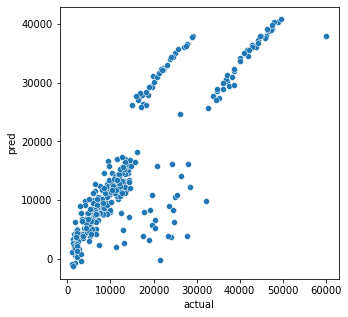

In [89]:
# 산정도 그리기
plt.figure(figsize=(5,5))
sns.scatterplot(x='actual',y='pred', data=comparison)
plt.show()

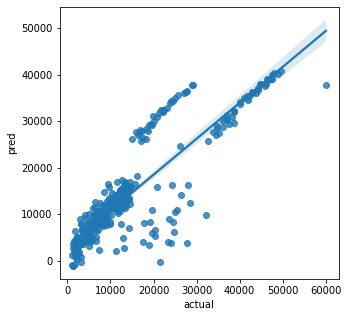

In [90]:
# 선형회귀선 추가
plt.figure(figsize=(5,5))
sns.regplot(x='actual',y='pred', data=comparison)
plt.show()

### RMSE & R²(결정계수)
> 회귀 -> 연속형 변수를 예측할 때 쓰임 -> 값들의 나열되면서 예측값-실제값 차이 = 오차 
* 이 오차들을 기준으로 모델의 성능이 결정

|평가지표|설명|
|-|-|
|오차를 구하는 방법(m과e포함된 공통점이!)|오차의 크기가 작을 수록 좋다|
|MAE (Mean Absolute Error, 평균 절대 오차)|- 실젯값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|MSE (Mean Squared Error, 평균 제곱 오차)|- 실젯값과 예측값 사이의 오차를  제곱한 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|RMSE (Root Mean Absolute Error, 루트 평균 제곱 오차)<br>|- MSE에 루트를 씌운 값<br>- 0에 가까울수록 좋음<br>- 연속형 변수를 예측할 때 가장 일반적으로 사용되는 평가지표|
|R²|- 결정계수<br>- 독립변수가 종속변수를 얼마만큼 설명해 주는지 나타내는 지표, 즉 설명력<br>- `1에 가까울수록 좋음`|
```

### mean_squared_error()

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
# mes -> 실제값과 예측값
mean_squared_error(y_test, pred) #squared=True가 기본
# MSE - 다른 모델을 만들어야 의미가 있음(비교용!)
# 다른변수를 추가하거나 열의 갯수 차이, 다른 알고리즘을 다르게 만들어도 다른 모델이다!
# 모델 간 비교(다른 알고리즘, 다른 독립변수 조합)


38893036.30099522

In [93]:
#rmse
mean_squared_error(y_test,pred) ** 0.5 # 루트를 씌워주는 역활

6236.42816851082

In [ ]:
#rmse
mean_squared_error(y_test,pred, squared=False) # 원래 제곱을 해서 나오는데 꺼버려서 루트쓴 것과 같다

In [94]:
# 학습시킨 독립변수와 종속변수를 집어 넣으면 
model.score(X_train, y_train)#R2

0.7521688026672133

$R^2 = \frac{SSR}{SST}$<br>
* SST = SSR+SSE 
* **SST** (Sum of Squares Total) : 총변동
* **SSR** (Sum of Squares Regression) : 설명 가능한 변동
* **SSE** : 설명이 안되는 변동
* 모델이 얼마나 값의 변동을 잘 설명하는가? = 예측을 잘하는가?
* 설명이 가능한 예측한 값을 수행되는 것이 좋은데
설명이 불가능한 값은 예측을 벗어난 것 - 좋지 않은 경우

* adsp, 빅데이터 분석기사에서 자세한 내용을 볼 수 있음

In [ ]:
# 예측값과 다르게 이동한 관측값
# https://m.blog.naver.com/pmw9440/221822183325

## 선형회귀 `Linear Regression`
* 독립변수와 종속변수 간에 선형 관계가 있음을 가정하여 최적의 선을 그려서 예측하는 방법
* 머신러닝에서는 손실(오차)함수 `Loss Function` 를 최소화하는 선을 찾아서 모델을 만들어냄
* 수식을 도출하기에 매우 쉽기때문에 그 해석도 직관적
  * 회귀 직선의 수식에 관련된 값을 제공


In [95]:
import numpy as np

# 독립변수별 계수 확인
# 독립변수들로 그래프를 그림  변수별 가중치 붙음 = 가중치가 계수
model.coef_

array([  268.93208964,   312.77295558,   402.71181137, 24113.16200791,
        -469.89958085,  -156.02007356,  -887.78093748,  -612.62764562])

In [96]:
# ex) 나이가 1증가하면 그 값에 가중치 268.93이 더해지는 것
pd.Series(model.coef_, index=X.columns)

age                  268.93
bmi                  312.77
children             402.71
smoker             24113.16
sex_male            -469.90
region_northwest    -156.02
region_southeast    -887.78
region_southwest    -612.63
dtype: float64

In [98]:
 # ax+by+cz+d
#d를 절편, inter
model.intercept_

-11615.270871927929

$261.94 × age + 339.54 × bmi + 607.58 × children + 23878.00 × smoker + 42.42× sex male + (-394.02) × region northwest + (-1073.15) × region southeast + (-973.02) × region southwest -12258.305052625143$

* 모델의 계수를 해석할 때 '부호'의 영향에 유의
* 부호화 상관없이 **계수의 절댓값이 클수록 영향이 크다**고 하고, 절대값이 0에 가까울 수록 영향력이 거의 없다
* 여러 계수를 서로 비교할때, 단순히 절댓값이 더 크면 영향이 크다? => 각 젼수의 스케일(단위) 
* age와 sex, region은 비교 불가
  * sex와 region은 0과 1로 구성됨
* 이부분은 스케일링할 때 더 자세히 배움

## 모델 배포
* 모델 -> 확장자가 pkl로 배포

In [99]:
!pip install mlxtend -q

In [100]:
import joblib #pkl 세이브 파일을 만들어주는 라이브러리

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [102]:
model_from_joblib = joblib.load('first_model.pkl')
model_from_joblib

LinearRegression()

In [103]:
pd.Series(model_from_joblib.coef_, index = X.columns)

age                  268.93
bmi                  312.77
children             402.71
smoker             24113.16
sex_male            -469.90
region_northwest    -156.02
region_southeast    -887.78
region_southwest    -612.63
dtype: float64

In [105]:
from google.colab import files

files.download('first_model.pkl') # 파일로 다운로드

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>